# Projet Deep Learning

## Imports

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import json
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, Xception
from tensorflow.keras.optimizers import Adam

In [2]:
# V√©rifier la version de TensorFlow
print("TensorFlow version:", tf.__version__)

# T√©l√©chargement et extraction des donn√©es
data_dir = 'Fish.v1-416x416.tensorflow'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

# Analyse exploratoire des donn√©es (EDA)
num_train_images = len(os.listdir(train_dir))
num_test_images = len(os.listdir(test_dir))
num_valid_images = len(os.listdir(valid_dir))

print("Nombre d'images dans le dossier d'entra√Ænement:", num_train_images)
print("Nombre d'images dans le dossier de test:", num_test_images)
print("Nombre d'images dans le dossier de validation:", num_valid_images)


TensorFlow version: 2.15.0
Nombre d'images dans le dossier d'entra√Ænement: 945
Nombre d'images dans le dossier de test: 137
Nombre d'images dans le dossier de validation: 271


Exemples d'images dans le dossier d'entra√Ænement:


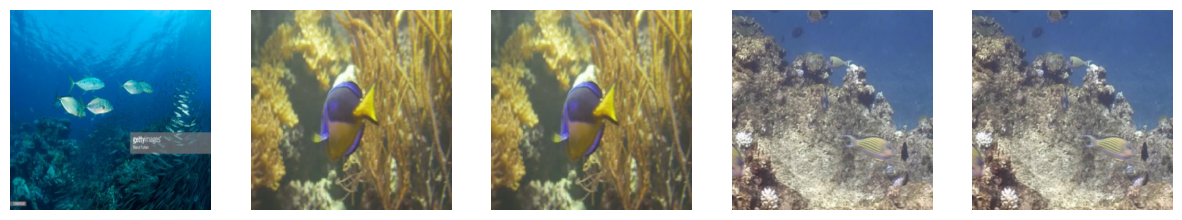

Exemples d'images dans le dossier de test:


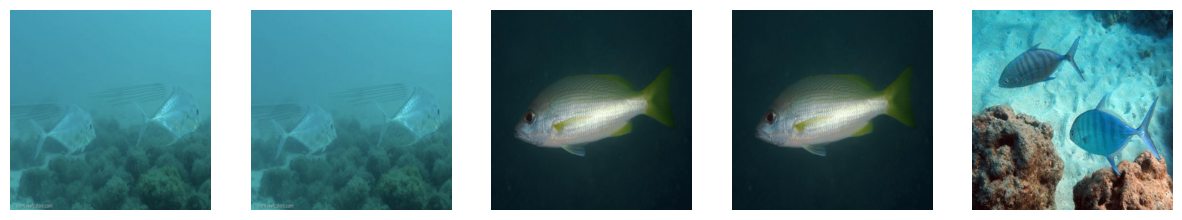

Exemples d'images dans le dossier de validation:


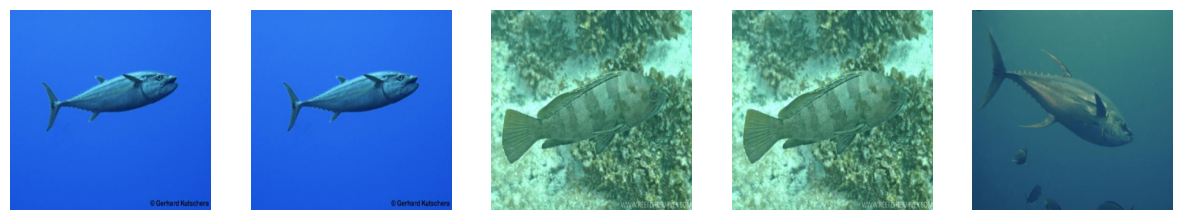

In [3]:
def display_images(directory, num_images=5):
    images = os.listdir(directory)
    num_images = min(num_images, len(images))

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        img_path = os.path.join(directory, images[i])
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

# Afficher des exemples d'images pour chaque ensemble de donn√©es
print("Exemples d'images dans le dossier d'entra√Ænement:")
display_images(train_dir)

print("Exemples d'images dans le dossier de test:")
display_images(test_dir)

print("Exemples d'images dans le dossier de validation:")
display_images(valid_dir)


## 1. Classification

In [4]:
def crop_images(initial_directory, destination):
    # Charger les annotations √† partir du fichier CSV
    annotations_file = '_annotations.csv'
    annotations_df = pd.read_csv(os.path.join(initial_directory, annotations_file))

    # Parcourir les annotations
    for index, row in annotations_df.iterrows():
        # Charger l'image correspondante
        image_path = os.path.join(initial_directory, row['filename'])
        image = cv2.imread(image_path)

        # V√©rifier si l'image a √©t√© charg√©e avec succ√®s
        if image is None:
            print(f"Impossible de charger l'image: {image_path}")
            continue

        # R√©cup√©rer les coordonn√©es du rectangle annot√©
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])

        # Cropper l'image selon le rectangle annot√©
        cropped_image = image[ymin:ymax, xmin:xmax]

        # V√©rifier si l'image cropp√©e est valide
        if cropped_image.size == 0 or cropped_image.shape[0] == 0 or cropped_image.shape[1] == 0:
            print(f"Image cropp√©e invalide pour l'image: {image_path}")
            continue

        # Trouver la classe annot√©e (l'esp√®ce de poisson)
        class_name = row['class']

        # Pr√©parer le dossier de sauvegarde
        save_dir = os.path.join(destination, class_name)
        os.makedirs(save_dir, exist_ok=True)

        # Construire un nom de fichier unique pour √©viter les √©crasements
        base_filename, file_extension = os.path.splitext(row['filename'])
        unique_filename = f"{base_filename}_{index}{file_extension}"
        save_path = os.path.join(save_dir, unique_filename)

        # Sauvegarder l'image cropp√©e
        cv2.imwrite(save_path, cropped_image)
        print(f"Image cropp√©e et sauvegard√©e: {save_path}")

crop_images(train_dir, "cropped_train_images")
crop_images(test_dir, "cropped_test_images")
crop_images(valid_dir, "cropped_valid_images")

Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset232_png.rf.CC8AfGJBFvbo9JTlNPe4_0.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset232_png.rf.CC8AfGJBFvbo9JTlNPe4_1.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_2.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_3.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_4.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_5.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_6.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_7.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_8.jpg
Image cropp√©

Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset734_png.rf.FosMuRRVL0F0k2249lKA_82.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_83.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_84.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_85.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_86.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_87.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_88.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_89.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_90.jpg
Image cropp√

Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset646_png.rf.HwzaehVtRT0KQYO8jRF2_168.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset438_png.rf.IHbg1USnEMwR4arbbJTa_169.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset438_png.rf.IHbg1USnEMwR4arbbJTa_170.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset57_png.rf.ILD4ggJhQHQNDcSnwIY5_171.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset57_png.rf.ILD4ggJhQHQNDcSnwIY5_172.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset320_png.rf.JlSghslN0h6NKS7natVb_173.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset92_png.rf.IRwy5rmKBRpyklxRuLfW_174.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset678_png.rf.HhDvrjK8Pzz65icMaJV4_175.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset678_png.rf.HhDvrjK8Pzz65icMaJV4_176.jp

Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset457_png.rf.Nv5CGscWT2BVsvyN50zP_253.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset190_png.rf.LGN4IBpqePh377HPQNhj_254.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_255.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_256.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_257.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_258.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_259.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_260.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_261.jpg
Image cropp√

Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset540_png.rf.ShOQSitvkVN4m7uAE7KW_350.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset148_png.rf.Ub82tnjCQCPt1AFx0G20_351.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset728_png.rf.UwssM8hlwFVgMWfqQJPz_352.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset728_png.rf.UwssM8hlwFVgMWfqQJPz_353.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset235_png.rf.T0CR5WkALKZzOb3yrhLo_354.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset335_png.rf.U6aIT7qvfU9ePslUSOyh_355.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset335_png.rf.U6aIT7qvfU9ePslUSOyh_356.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset335_png.rf.U6aIT7qvfU9ePslUSOyh_357.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset335_png.rf.U6aIT7qvfU9ePslUSOyh_3

Image cropp√©e et sauvegard√©e: cropped_train_images\Serranidae -Groupers-\FishDataset542_png.rf.a476f69e8be4b461262b4870f316a299_422.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Serranidae -Groupers-\FishDataset343_png.rf.a3d72480eeadda2c7de8209579bd695b_423.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset691_png.rf.a15aa0b4aeaed9e4dd7383c02ade32ad_424.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset218_png.rf.a43441767febfc23a054119387d6c529_425.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset437_png.rf.a672a93409e9342b919337a5a9247573_426.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset437_png.rf.a672a93409e9342b919337a5a9247573_427.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset437_png.rf.a672a93409e9342b919337a5a9247573_428.jpg
Image cropp√©e et sauvegard√©e: cropp

Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_498.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_499.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_500.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_501.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_502.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset611_png.rf.b43a283742bd3dc0e8b99bfd885dfd4d_503.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset449_png.rf.b4766c5a3057091babc837225f915021_504.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset449_png.rf.b4766c5a3057091babc837225f915021_505.jpg
Image cropp√©e et sauvegar

Image cropp√©e et sauvegard√©e: cropped_train_images\Serranidae -Groupers-\FishDataset91_png.rf.02dc3f5fb2f75f1f83305f4c4b95b2ff_568.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset519_png.rf.013d3a2ae4fc980d3c24bc1640cc7e54_569.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset422_png.rf.06390f476820a78df6e8a570672b4588_570.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset498_png.rf.060887c1b252fe467346a3f0bd986688_571.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset498_png.rf.060887c1b252fe467346a3f0bd986688_572.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset498_png.rf.060887c1b252fe467346a3f0bd986688_573.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset498_png.rf.060887c1b252fe467346a3f0bd986688_574.jpg
Image cropp√©e et sauvegard√

Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset722_png.rf.1332583f54f1f09dbacee8b2008714f2_656.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset722_png.rf.1332583f54f1f09dbacee8b2008714f2_657.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset120_png.rf.161135b9d2d8ae9971a609b7bb6bf5a5_658.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Serranidae -Groupers-\FishDataset145_png.rf.10bec3f724763535c74bd3c6830c0cf6_659.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset355_png.rf.16be81271625b501ce59e7a2d9880f58_660.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset612_png.rf.1832627bc169e0af0323250a715819fa_661.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset129_png.rf.14a9b10dc9c8b3cc5690f3838842c4b4_662.jpg
Image cropp√©e et sauvegard√©e:

Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset644_png.rf.2d2fc0416d30fac9fc93b59bb8dc69ec_754.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset644_png.rf.2d2fc0416d30fac9fc93b59bb8dc69ec_755.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset644_png.rf.2d2fc0416d30fac9fc93b59bb8dc69ec_756.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset644_png.rf.2d2fc0416d30fac9fc93b59bb8dc69ec_757.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset497_png.rf.2d4e80963d2f55dfcef9932529d34458_758.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset497_png.rf.2d4e80963d2f55dfcef9932529d34458_759.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset667_png.rf.2e566b5f45c4336fc7e7161e509f1dbf_760.jpg
Image cropp√©e et sauvegard√©e: cr

Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset433_png.rf.uEgPfdVyLrImxBha1Qxx_834.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset398_png.rf.vKbaeczu9SEX221RUs0o_835.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset673_png.rf.vgafWNRzeVGCudHAbx9h_836.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset673_png.rf.vgafWNRzeVGCudHAbx9h_837.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset673_png.rf.vgafWNRzeVGCudHAbx9h_838.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset616_png.rf.vFlqLNDZ3gTM9eJgOgTN_839.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset526_png.rf.vdApYe7VrTvO4jMGPB4p_840.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset519_png.rf.t16JxYfN0rjpg0drLVxI_841.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset696_png.rf.tPXyYC9QdLAHLEY8zF4g_842.jp

Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset488_png.rf.xZBL77EB47tqViOJTLNK_916.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset488_png.rf.xZBL77EB47tqViOJTLNK_917.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset488_png.rf.xZBL77EB47tqViOJTLNK_918.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset427_png.rf.xfX3u3ZFmv2Dixrdpi65_919.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset611_png.rf.zubQkzoc2znL6mDZjYj3_920.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset385_png.rf.z9ELv47DWqJtd8QrYVi8_921.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset83_png.rf.2w6MmJ6t25XSCXgJPvm0_922.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset83_png.rf.2w6MmJ6t25XSCXgJPvm0_923.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset228_png.rf.2foRw6luApoKN7fjqEho_924.jpg
Image c

Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset405_png.rf.3ommDahzAaVK5jVOkqvN_998.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset540_png.rf.42606cf2cb7265fe0f493b65a3e4e82c_999.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset25_png.rf.4532362c361066a588637c6cf4699dd0_1000.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset260_png.rf.3ec15b1fc078f73850d4a07a45d5b764_1001.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset131_png.rf.449eb614f56091c49cebd7dca309cd59_1002.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset131_png.rf.449eb614f56091c49cebd7dca309cd59_1003.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset131_png.rf.449eb614f56091c49cebd7dca309cd59_1004.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangid

Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset627_png.rf.5480c04327a677ba546b4325fd4ea63a_1072.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset31_png.rf.58df19c82cb0a52e01c3c66e25f82467_1073.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset92_png.rf.547b908f9db39a64f54e6105dddbc847_1074.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset725_png.rf.54b0a3f4cdb9c66119a9f6ad6ff8c29c_1075.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset725_png.rf.54b0a3f4cdb9c66119a9f6ad6ff8c29c_1076.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset274_png.rf.58ea47fe8d57243e3e2e5053b898f746_1077.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Ephippidae -Spadefishes-\FishDataset274_png.rf.58ea47fe8d57243e3e2e5053b898f746_1078.jpg
Image cropp√©e et sauvegard√©e: 

Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset142_png.rf.649143cedb7ffa6f9bdd99a556728fff_1171.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset293_png.rf.69ab032822d43f023c50a0375a614eb5_1172.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Serranidae -Groupers-\FishDataset307_png.rf.63f392ededab8a787bef64841892a336_1173.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset208_png.rf.686848bfb6574ddb9b2b7328db3a44aa_1174.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset664_png.rf.6B4usimEHJdfXRGjqSOg_1175.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset735_png.rf.68FXQNEGiyA39B1Qvdd9_1176.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset42_png.rf.6bb3c9760bc9531791effe1b07d86af1_1177.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas

Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1252.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1253.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1254.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1255.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1256.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1257.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset314_png.rf.6fba016674b32ef5a4f17243829f1fa3_1258.jpg
Image cropp√©e et sauvegard√©e: cropped_train_im

Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset159_png.rf.7cde47c1287bb6e89c3c35840bed1e4c_1328.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset294_png.rf.7b121b6511f4180aa056edcc5e083a4c_1329.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset294_png.rf.7b121b6511f4180aa056edcc5e083a4c_1330.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset72_png.rf.7tcZnEXmfQfL9WQE5Sw3_1331.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset71_png.rf.7WjuTQe1oqOBh1pwU3cC_1332.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset680_png.rf.7t7O6Znh0KsX9v5PXk25_1333.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset100_png.rf.7d24ba5eb55a0068d0985f29cc437b36_1334.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset26_png.rf.746aaf13838e

Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1405.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1406.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1407.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1408.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset694_png.rf.8GJaASIyVqhH2NuzI550_1409.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset346_png.rf.8cddd70279bbf213842d9fc99683f606_1410.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset263_png.rf.84235f0554ca1449f75c7cb5bc9acc6b_1411.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Sna

Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset111_png.rf.9cqWbl94l3V8aOiIujR4_1497.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset111_png.rf.9cqWbl94l3V8aOiIujR4_1498.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset111_png.rf.9cqWbl94l3V8aOiIujR4_1499.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset111_png.rf.9cqWbl94l3V8aOiIujR4_1500.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset365_png.rf.9jyaCTFImZ4SZ5OIWX9t_1501.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset365_png.rf.9jyaCTFImZ4SZ5OIWX9t_1502.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset365_png.rf.9jyaCTFImZ4SZ5OIWX9t_1503.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset703_png.rf.bXO9EjKGYzP4GyVgfDtC_1504.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset703_png.rf.bXO9EjKGYzP4GyVgfDtC_1

Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset77_png.rf.ce19a2ed408ab5262a009729d3e19a50_1581.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset77_png.rf.ce19a2ed408ab5262a009729d3e19a50_1582.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset77_png.rf.ce19a2ed408ab5262a009729d3e19a50_1583.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset77_png.rf.ce19a2ed408ab5262a009729d3e19a50_1584.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset152_png.rf.ce96ac1e078df1451c6ea679195835a2_1585.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset664_png.rf.cf775648f11b292cf594a9edaf568f1e_1586.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset658_png.rf.c9c4d9d5691f3254e87bcbc6136dc73e_1587.jpg
Imag

Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1664.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1665.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1666.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1667.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1668.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1669.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bb

Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset472_png.rf.ec24d745be73fe7470ac0e583c9281f2_1728.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset254_png.rf.eSPHtv8n7D0Cbj0mF9tJ_1729.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset254_png.rf.eSPHtv8n7D0Cbj0mF9tJ_1730.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset591_png.rf.ec75c2f71138cd373e8da5d941af1a19_1731.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1732.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1733.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1734.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1735.jpg
Image cropp√©e et sauvegard√©e: cro

Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset638_png.rf.etoHMNiI9tFD5lw5tAZw_1800.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset192_png.rf.ecfae86d5f9009e205be2bb83de0e21b_1801.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset360_png.rf.f84d5710cf746220ea5d249bef4dde76_1802.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset707_png.rf.f00276a13eae8ee85a28b1b143240b09_1803.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset707_png.rf.f00276a13eae8ee85a28b1b143240b09_1804.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset707_png.rf.f00276a13eae8ee85a28b1b143240b09_1805.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset707_png.rf.f00276a13eae8ee85a28b1b143240b09_1806.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jack

Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset476_png.rf.fbdff21fbaa9a7395f93de670736d049_1893.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset291_png.rf.iATkApPga3LxIHvuok1G_1894.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset45_png.rf.fu6bXxDTdxT9MdMjM1db_1895.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset604_png.rf.hhkVhHGnovR87uJAIRJs_1896.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset67_png.rf.f88b948c0332247a3b0756c6d621c1ca_1897.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset168_png.rf.iIw8zl88N8oVCyamWdlk_1898.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset168_png.rf.iIw8zl88N8oVCyamWdlk_1899.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset168_png.rf.iIw8zl88N8oVCyamWdlk_1900.jpg
Image cropp√©e et sauvegard√©e: cropped

Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset582_png.rf.mHDumVDFBc5OZyYJjyrg_1982.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset582_png.rf.mHDumVDFBc5OZyYJjyrg_1983.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset344_png.rf.jnmVQlefU9GiJC1sZg5r_1984.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset329_png.rf.l1rfvkTDyFsHIIynK4WE_1985.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset219_png.rf.ljdQgLG79J1P2rqWj35a_1986.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset688_png.rf.lUL7egJT6TQzPe4vqinM_1987.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset11_png.rf.lhkWaztcC06eHpeXUekm_1988.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset11_png.rf.lhkWaztcC06eHpeXUekm_1989.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset11_png.rf.lhkWaztcC06eHpeXUekm_1990.jpg
Image crop

Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset312_png.rf.q4WnsPrz41Sr7yvg45vR_2073.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset312_png.rf.q4WnsPrz41Sr7yvg45vR_2074.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset312_png.rf.q4WnsPrz41Sr7yvg45vR_2075.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset312_png.rf.q4WnsPrz41Sr7yvg45vR_2076.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Lutjanidae -Snappers-\FishDataset285_png.rf.30b2d9af784724227bfe722520b8cf91_0.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Carangidae -Jacks-\FishDataset650_png.rf.0a14f4401f6beedde7c2807f49850098_1.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Carangidae -Jacks-\FishDataset650_png.rf.0a14f4401f6beedde7c2807f49850098_2.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset97_png.rf.0bb11163a08456dfaf69c8cfa24877e7_3.jpg
Image cropp√©e e

Image cropp√©e et sauvegard√©e: cropped_test_images\Carangidae -Jacks-\FishDataset618_png.rf.6f00c98d79be2d06f4d302d8d27bdb81_68.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Carangidae -Jacks-\FishDataset618_png.rf.6f00c98d79be2d06f4d302d8d27bdb81_69.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Shark -Selachimorpha-\FishDataset489_png.rf.7491ed4407e4ba7af1a8ec418e8ed23f_70.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\jack\FishDataset618_png.rf.7BVZZwyPeU1Jx2KvwSIj_71.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\jack\FishDataset618_png.rf.7BVZZwyPeU1Jx2KvwSIj_72.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Shark -Selachimorpha-\FishDataset508_png.rf.77473a5edb1e3e4dfcadd14806734842_73.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Scombridae -Tunas-\FishDataset238_png.rf.91f7386105c8eb06b5336d71d43dde86_74.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Scombridae -Tunas-\FishDataset238_png.rf.91f7386105c8eb06b5336d

Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_156.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_157.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_158.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_159.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_160.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_161.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_

Image cropp√©e et sauvegard√©e: cropped_test_images\Carangidae -Jacks-\FishDataset534_png.rf.e5fb5b7180b7522ef1c7ccfb07414e18_221.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Carangidae -Jacks-\FishDataset534_png.rf.e5fb5b7180b7522ef1c7ccfb07414e18_222.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Carangidae -Jacks-\FishDataset534_png.rf.e5fb5b7180b7522ef1c7ccfb07414e18_223.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Carangidae -Jacks-\FishDataset534_png.rf.e5fb5b7180b7522ef1c7ccfb07414e18_224.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Carangidae -Jacks-\FishDataset534_png.rf.e5fb5b7180b7522ef1c7ccfb07414e18_225.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_226.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_227.jpg
Image cropp√©e et sauvegard√©e: cropped_te

Image cropp√©e et sauvegard√©e: cropped_test_images\jack\FishDataset531_png.rf.kzb7s1Jqu5op3ZWPU4kZ_326.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\jack\FishDataset531_png.rf.kzb7s1Jqu5op3ZWPU4kZ_327.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\parrot\FishDataset245_png.rf.m04phkDbP33LYUfcFRie_328.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\surgeon\FishDataset97_png.rf.paAi5x2V9rw0Ocph7DiQ_329.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\surgeon\FishDataset97_png.rf.paAi5x2V9rw0Ocph7DiQ_330.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\surgeon\FishDataset97_png.rf.paAi5x2V9rw0Ocph7DiQ_331.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\surgeon\FishDataset97_png.rf.paAi5x2V9rw0Ocph7DiQ_332.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\surgeon\FishDataset97_png.rf.paAi5x2V9rw0Ocph7DiQ_333.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\tuna\FishDataset374_png.rf.qQaKOi97VokjlhJ6HV4I_334.jpg
Image cropp√©e e

Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset609_png.rf.bb8f98e0c8285221186b5ae35dcdfffd_0.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset609_png.rf.bb8f98e0c8285221186b5ae35dcdfffd_1.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset609_png.rf.bb8f98e0c8285221186b5ae35dcdfffd_2.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset609_png.rf.bb8f98e0c8285221186b5ae35dcdfffd_3.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Carangidae -Jacks-\FishDataset156_png.rf.ba1045c5373f2fa6478c1f221cb264f2_4.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Carangidae -Jacks-\FishDataset156_png.rf.ba1045c5373f2fa6478c1f221cb264f2_5.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Carangidae -Jacks-\FishDataset156_png.rf.ba1045c5373f2fa6478c1f221cb264f2_6.jpg
Image cropp√©e et sauvegard√©

Image cropp√©e et sauvegard√©e: cropped_valid_images\grouper\FishDataset193_png.rf.csozALv18G7HKMiXj4Dn_82.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset339_png.rf.d517190a997a74cddcf2f2926db14566_83.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Scombridae -Tunas-\FishDataset324_png.rf.f96fc8301bcd8a63bbd03ecb7e243fb0_84.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_85.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_86.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_87.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_88.jpg
Image cropp√©e et sauvegard√©e: cropped_va

Image cropp√©e et sauvegard√©e: cropped_valid_images\shark\FishDataset712_png.rf.nDn7OcBRjqIhY7Uy0xRH_162.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\tuna\FishDataset170_png.rf.s1Q08ts6mLLwGwFwvwfe_163.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset393_png.rf.rrhMSU1b5YmOcL7A7kVd_164.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_165.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_166.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_167.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_168.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d3118

Image cropp√©e et sauvegard√©e: cropped_valid_images\Shark -Selachimorpha-\FishDataset439_png.rf.0e7837b018b9df0eff54a1a4dbc05e7f_259.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset390_png.rf.0daec7315f7a85190a1d6f1208e973c2_260.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\parrot\FishDataset470_png.rf.0c15RffHRccy8NvXwvPI_261.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\shark\FishDataset661_png.rf.0zMvYqHtLcp30F3PtWfr_262.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Serranidae -Groupers-\FishDataset464_png.rf.00747c003901008c458ea255ef82af2c_263.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Serranidae -Groupers-\FishDataset711_png.rf.05b73cd73241679555363b0664d62389_264.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Serranidae -Groupers-\FishDataset711_png.rf.05b73cd73241679555363b0664d62389_265.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Serranidae -Groupers-\FishDataset711

Image cropp√©e et sauvegard√©e: cropped_valid_images\Serranidae -Groupers-\FishDataset396_png.rf.1a7d5f80f09954afee3d5a4b5c3ebb8a_341.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_342.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_343.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_344.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_345.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_346.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_347.jpg
Image cropp√©e et sauvegard√©e: cr

Image cropp√©e et sauvegard√©e: cropped_valid_images\Carangidae -Jacks-\FishDataset408_png.rf.7ada800414e2ba20795be9673276ccc5_432.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Carangidae -Jacks-\FishDataset408_png.rf.7ada800414e2ba20795be9673276ccc5_433.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Carangidae -Jacks-\FishDataset408_png.rf.7ada800414e2ba20795be9673276ccc5_434.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Carangidae -Jacks-\FishDataset408_png.rf.7ada800414e2ba20795be9673276ccc5_435.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\grouper\FishDataset622_png.rf.7MGByjmrrVr6WXlyunff_436.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset538_png.rf.3tQSGJ0lUoZk8t0P2gYf_437.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Carangidae -Jacks-\FishDataset687_png.rf.80102f4eb256aa4ad17b301a21a5edf4_438.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Shark -Selachimorpha-\FishDataset66_png.rf.815cf8f5

Image cropp√©e et sauvegard√©e: cropped_valid_images\Serranidae -Groupers-\FishDataset623_png.rf.9350ff918e188c42985a60ffe0ad317e_503.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\grouper\FishDataset389_png.rf.Ef8d9vNsA6Q1OjBxQHcc_504.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_505.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_506.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_507.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_508.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_509.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_510.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset256_pn

Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset230_png.rf.UqqLWgp11OxexAfojhkX_579.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset230_png.rf.UqqLWgp11OxexAfojhkX_580.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset230_png.rf.UqqLWgp11OxexAfojhkX_581.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset230_png.rf.UqqLWgp11OxexAfojhkX_582.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset448_png.rf.AFzqWy6XzaBV5WrEHsZC_583.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\shark\FishDataset511_png.rf.Iy4i98WYknzLP3FEcEND_584.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset339_png.rf.OaYV1VJV24oPSXg3Bebt_585.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\shark\FishDataset56_png.rf.OGRe3qJnJrfYCT9zBXPl_586.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\grouper\FishDataset628_png.rf.JoBvRaOonLa5bzCJVxQF_587.jpg


In [5]:
#  Pr√©paration des donn√©es pour l'entra√Ænement

# Chemin vers le dossier contenant les images cropp√©es
base_dir = 'cropped_train_images'

# Cr√©ation des g√©n√©rateurs d'images (mais sans augmentation de donn√©es) pour l'entra√Ænement
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)  # Utilisation de 20% des donn√©es pour la validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images apr√®s redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='training')  # D√©fini pour l'entra√Ænement

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images apr√®s redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # D√©fini pour la validation

Found 1669 images belonging to 26 classes.
Found 406 images belonging to 26 classes.


In [6]:
# D√©finir le mod√®le (la derni√®re couche correspond au nombre de classes)
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compiler le mod√®le
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher le r√©sum√© du mod√®le
model1.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

In [7]:
# Entra√Ænement du mod√®le
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du mod√®le

val_loss, val_acc = model1.evaluate(validation_generator,
                                   steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_acc}')

Epoch 1/50


52/52 [==============================] - 23s 414ms/step - loss: 2.6963 - accuracy: 0.1460 - val_loss: 2.3658 - val_accuracy: 0.1823
Epoch 2/50
52/52 [==============================] - 14s 275ms/step - loss: 2.4191 - accuracy: 0.1857 - val_loss: 2.2112 - val_accuracy: 0.2292
Epoch 3/50
52/52 [==============================] - 16s 310ms/step - loss: 2.2523 - accuracy: 0.2382 - val_loss: 2.1559 - val_accuracy: 0.2578
Epoch 4/50
52/52 [==============================] - 17s 335ms/step - loss: 2.1020 - accuracy: 0.2621 - val_loss: 2.0851 - val_accuracy: 0.2682
Epoch 5/50
52/52 [==============================] - 16s 315ms/step - loss: 1.9898 - accuracy: 0.2657 - val_loss: 2.0562 - val_accuracy: 0.2682
Epoch 6/50
52/52 [==============================] - 17s 325ms/step - loss: 1.7845 - accuracy: 0.3262 - val_loss: 2.0186 - val_accuracy: 0.2734
Epoch 7/50
52/52 [==============================] - 16s 310ms/step - loss: 1.6497 - accuracy: 0.3305 - val_loss: 2.1546 - val_accuracy: 0.25

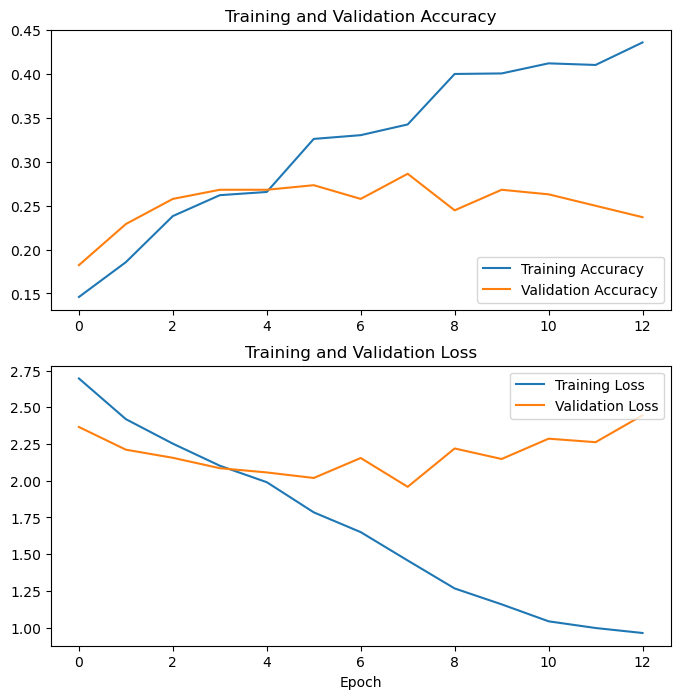

In [8]:
# Visualisation des r√©sultats de l'entra√Ænement

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()


üí¨ Remarque :

- Le mod√®le est sous-performant en ce qui concerne la pr√©cision, qui se situe autour de 25-30%. Cela sugg√®re que le mod√®le a du mal √† apprendre efficacement √† partir des donn√©es.

- Apprentissage Stable : Malgr√© la faible pr√©cision, l'am√©lioration constante au fil des √©poques sugg√®re que le mod√®le apprend. La tendance √† la baisse de la perte soutient cela, bien que cela indique qu'il y a une marge significative d'am√©lioration.

- Sous-apprentissage Potentiel : √âtant donn√© la faible pr√©cision et la perte √©lev√©e, le mod√®le pourrait sous-apprendre le jeu de donn√©es. Cela pourrait √™tre d√ª √† une complexit√© de mod√®le insuffisante, √† un temps d'entra√Ænement inad√©quat ou √† une extraction de caract√©ristiques sous-optimale.

- Tendances de Formation et de Validation Proches : Les lignes de formation et de validation pour la pr√©cision et la perte sont relativement proches, ce qui est g√©n√©ralement un bon signe. Cependant, dans ce contexte, cela indique probablement que le mod√®le sous-apprend √©galement sur les deux ensembles de donn√©es.

## 2. Transfert Learning

#### VGG16 model

In [9]:
# Charger le mod√®le pr√©-entra√Æn√© VGG16 avec les poids ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Geler les couches du mod√®le VGG16 pour emp√™cher l'entra√Ænement
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalis√©es au mod√®le
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Cr√©er un nouveau mod√®le en sp√©cifiant les entr√©es et les sorties
model_transfer_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compiler le mod√®le avec un optimiseur Adam
model_transfer_vgg16.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Afficher le r√©sum√© du mod√®le
model_transfer_vgg16.summary()

# Entra√Æner le mod√®le avec les donn√©es d'entra√Ænement
history_transfer = model_transfer_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du mod√®le transf√©r√©
val_loss_transfer, val_acc_transfer = model_transfer_vgg16.evaluate(
    validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss_transfer}, Validation accuracy: {val_acc_transfer}')




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

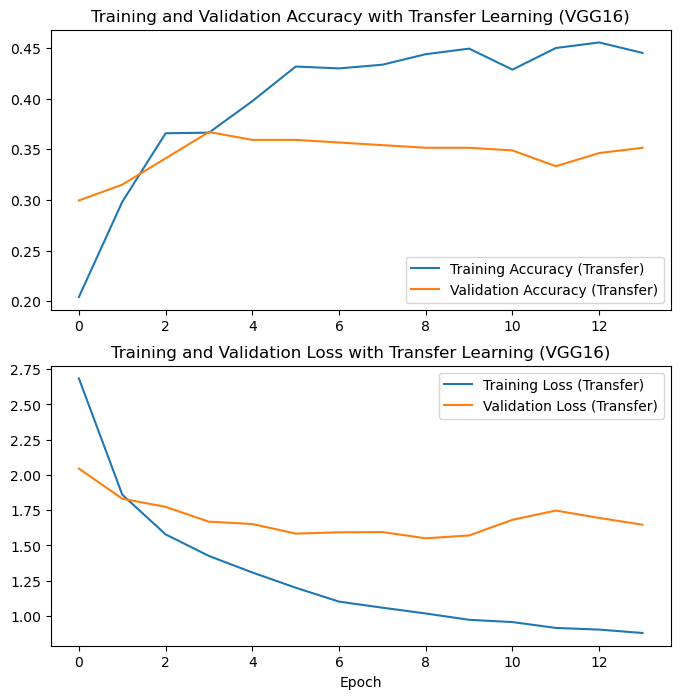

In [10]:
# Visualisation des r√©sultats de l'entra√Ænement avec transfert d'apprentissage
acc_transfer = history_transfer.history['accuracy']
val_acc_transfer = history_transfer.history['val_accuracy']
loss_transfer = history_transfer.history['loss']
val_loss_transfer = history_transfer.history['val_loss']

epochs_transfer = range(len(acc_transfer))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer, acc_transfer, label='Training Accuracy (Transfer)')
plt.plot(epochs_transfer, val_acc_transfer, label='Validation Accuracy (Transfer)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (VGG16)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer, loss_transfer, label='Training Loss (Transfer)')
plt.plot(epochs_transfer, val_loss_transfer, label='Validation Loss (Transfer)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (VGG16)')
plt.xlabel('Epoch')
plt.show()

### Comparaison des performances des deux mod√®les

12/12 [==============================] - 1s 81ms/step - loss: 1.9519 - accuracy: 0.2839
Validation loss (Scratch): 1.9519487619400024, Validation accuracy (Scratch): 0.2838541567325592
12/12 [==============================] - 21s 2s/step - loss: 1.5457 - accuracy: 0.3464
Validation loss (Transfer): 1.5457078218460083, Validation accuracy (Transfer): 0.3463541567325592


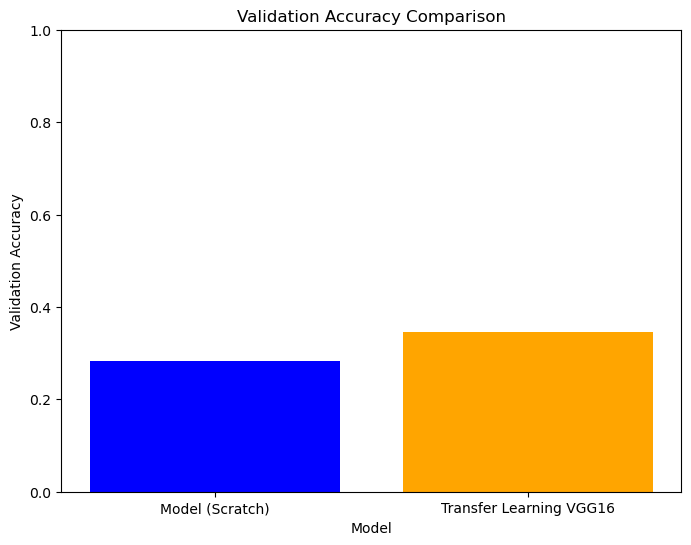

In [11]:
# Evaluation du mod√®le entra√Æn√© √† partir de z√©ro
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator,
                                                    steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Scratch): {val_loss_scratch}, Validation accuracy (Scratch): {val_acc_scratch}')

# Evaluation du mod√®le transf√©r√©
val_loss_transfer, val_acc_transfer = model_transfer_vgg16.evaluate(
    validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Transfer): {val_loss_transfer}, Validation accuracy (Transfer): {val_acc_transfer}')

# Visualisation des r√©sultats de comparaison

plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning VGG16'], [val_acc_scratch, val_acc_transfer], color=['blue', 'orange'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()


#### ResNet50 model

In [12]:
# Charger le mod√®le pr√©-entra√Æn√© ResNet50 avec les poids ImageNet
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Geler les couches du mod√®le ResNet50 pour emp√™cher l'entra√Ænement
for layer in base_model_resnet.layers:
    layer.trainable = False

# Ajouter des couches personnalis√©es au mod√®le ResNet50
x_resnet = Flatten()(base_model_resnet.output)
x_resnet = Dense(512, activation='relu')(x_resnet)
x_resnet = Dropout(0.5)(x_resnet)
predictions_resnet = Dense(len(train_generator.class_indices), activation='softmax')(x_resnet)

# Cr√©er un nouveau mod√®le en sp√©cifiant les entr√©es et les sorties
model_transfer_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

# Compiler le mod√®le avec un optimiseur Adam
model_transfer_resnet.compile(optimizer=Adam(),
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

# Entra√Æner le mod√®le avec les donn√©es d'entra√Ænement
history_transfer_resnet = model_transfer_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 62s 1s/step - loss: 3.8881 - accuracy: 0.0825 - val_loss: 2.6805 - val_accuracy: 0.1250
Epoch 2/50
52/52 [==============================] - 71s 1s/step - loss: 2.8349 - accuracy: 0.1081 - val_loss: 2.6068 - val_accuracy: 0.0964
Epoch 3/50
52/52 [==============================] - 70s 1s/step - loss: 2.7456 - accuracy: 0.1155 - val_loss: 2.6333 - val_accuracy: 0.1276
Epoch 4/50
52/52 [==============================] - 70s 1s/step - loss: 2.7040 - accuracy: 0.1057 - val_loss: 2.5600 - val_accuracy: 0.1354
Epoch 5/50
52/52 [==============================] - 69s 1s/step - loss: 2.6733 - accuracy: 0.1216 - val_loss: 2.5526 - val_accuracy: 0.1328
Epoch 6/50
52/52 [==============================] - 71s 1s/step - loss: 2.6495 - accuracy: 0.1292 - val_loss: 2.5537 - val_accuracy: 0.1328
Epoch 7/50
52/52 [==============================] - 69s 1s/step - loss: 2.6621 - accuracy: 0.1179 - val_loss: 2.5512 - val_accuracy: 0.1276
Epoch 8/50
52/52 [==

12/12 [==============================] - 12s 990ms/step - loss: 2.5074 - accuracy: 0.1328
Validation loss (ResNet50): 2.5074284076690674, Validation accuracy (ResNet50): 0.1328125


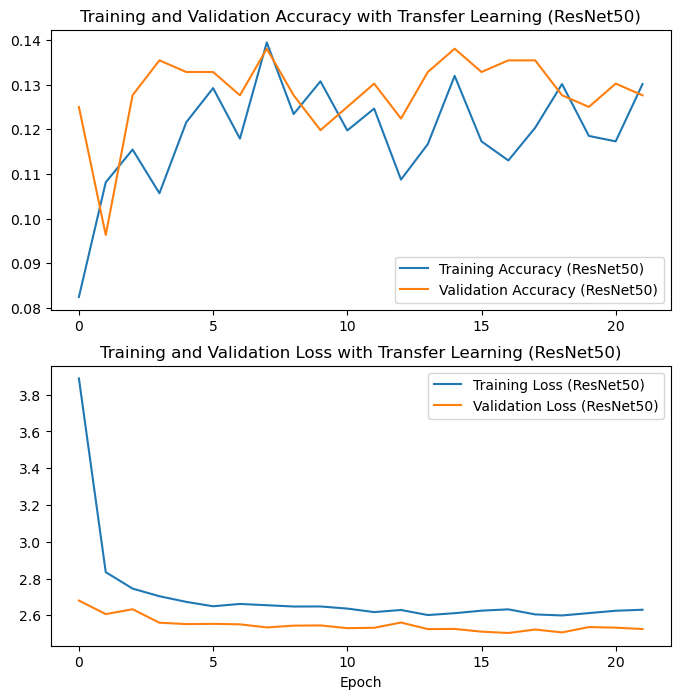

In [13]:

# Evaluation du mod√®le transf√©r√© ResNet50
val_loss_transfer_resnet, val_acc_transfer_resnet = model_transfer_resnet.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (ResNet50): {val_loss_transfer_resnet}, Validation accuracy (ResNet50): {val_acc_transfer_resnet}')

# Visualisation des r√©sultats de l'entra√Ænement avec transfert d'apprentissage ResNet50
acc_transfer_resnet = history_transfer_resnet.history['accuracy']
val_acc_transfer_resnet = history_transfer_resnet.history['val_accuracy']
loss_transfer_resnet = history_transfer_resnet.history['loss']
val_loss_transfer_resnet = history_transfer_resnet.history['val_loss']

epochs_transfer_resnet = range(len(acc_transfer_resnet))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_resnet, acc_transfer_resnet, label='Training Accuracy (ResNet50)')
plt.plot(epochs_transfer_resnet, val_acc_transfer_resnet, label='Validation Accuracy (ResNet50)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (ResNet50)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_resnet, loss_transfer_resnet, label='Training Loss (ResNet50)')
plt.plot(epochs_transfer_resnet, val_loss_transfer_resnet, label='Validation Loss (ResNet50)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (ResNet50)')
plt.xlabel('Epoch')
plt.show()

### Comparaison

12/12 [==============================] - 2s 121ms/step - loss: 1.9222 - accuracy: 0.2891
Validation loss (Scratch): 1.9221891164779663, Validation accuracy (Scratch): 0.2890625
12/12 [==============================] - 12s 991ms/step - loss: 2.5138 - accuracy: 0.1302
Validation loss (Transfer): 2.51375675201416, Validation accuracy (Transfer): 0.1302083283662796


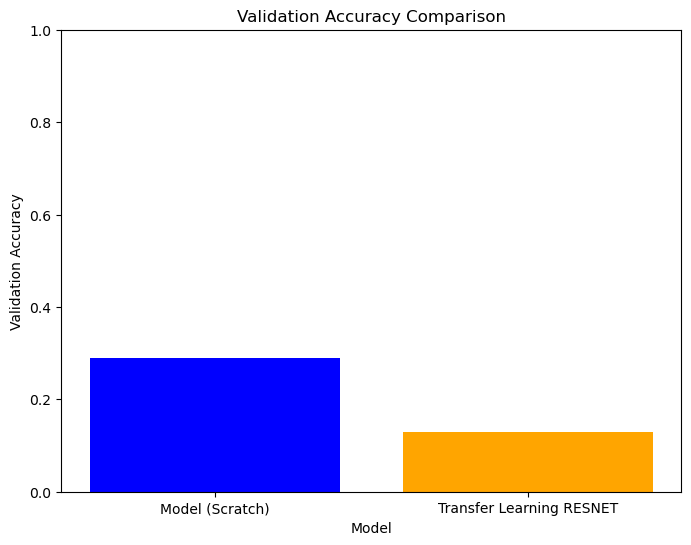

In [14]:
# Evaluation du mod√®le entra√Æn√© √† partir de z√©ro
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Scratch): {val_loss_scratch}, Validation accuracy (Scratch): {val_acc_scratch}')

# Evaluation du mod√®le transf√©r√©
val_loss_transfer, val_acc_transfer = model_transfer_resnet.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Transfer): {val_loss_transfer}, Validation accuracy (Transfer): {val_acc_transfer}')

# Visualisation des r√©sultats de comparaison

plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning RESNET'], [val_acc_scratch, val_acc_transfer], color=['blue', 'orange'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()


#### InceptionV3 model

In [15]:
# Load the InceptionV3 pre-trained model with ImageNet weights
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the InceptionV3 model
for layer in base_model_inception.layers:
    layer.trainable = False

# Add custom layers to the InceptionV3 base model
x_inception = Flatten()(base_model_inception.output)
x_inception = Dense(512, activation='relu')(x_inception)
x_inception = Dropout(0.5)(x_inception)
predictions_inception = Dense(len(train_generator.class_indices), activation='softmax')(x_inception)

# Create the full model
model_inception = Model(inputs=base_model_inception.input, outputs=predictions_inception)

# Compile the InceptionV3 model
model_inception.compile(optimizer=Adam(),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the InceptionV3 model
history_inception = model_inception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 46s 695ms/step - loss: 10.2438 - accuracy: 0.1698 - val_loss: 2.3855 - val_accuracy: 0.2240
Epoch 2/50
52/52 [==============================] - 34s 646ms/step - loss: 2.2992 - accuracy: 0.2529 - val_loss: 1.9566 - val_accuracy: 0.3073
Epoch 3/50
52/52 [==============================] - 34s 657ms/step - loss: 1.9872 - accuracy: 0.2767 - val_loss: 1.8948 - val_accuracy: 0.3203
Epoch 4/50
52/52 [==============================] - 34s 646ms/step - loss: 1.8250 - accuracy: 0.3158 - val_loss: 1.7943 - val_accuracy: 0.3229
Epoch 5/50
52/52 [==============================] - 34s 660ms/step - loss: 1.5861 - accuracy: 0.3372 - val_loss: 1.7662 - val_accuracy: 0.3021
Epoch 6/50
52/52 [==============================] - 34s 659ms/step - loss: 1.5130 - accuracy: 0.3476 - val_loss: 1.7434 - val_accuracy: 0.3047
Epoch 7/50
52/52 [==============================] - 34s 656ms/step - loss: 1.4854 - accuracy: 0.3476 - val_loss: 1.6856 - val_accuracy: 0.335

12/12 [==============================] - 5s 434ms/step - loss: 1.5884 - accuracy: 0.3438
Validation loss (InceptionV3): 1.5884138345718384, Validation accuracy (InceptionV3): 0.34375


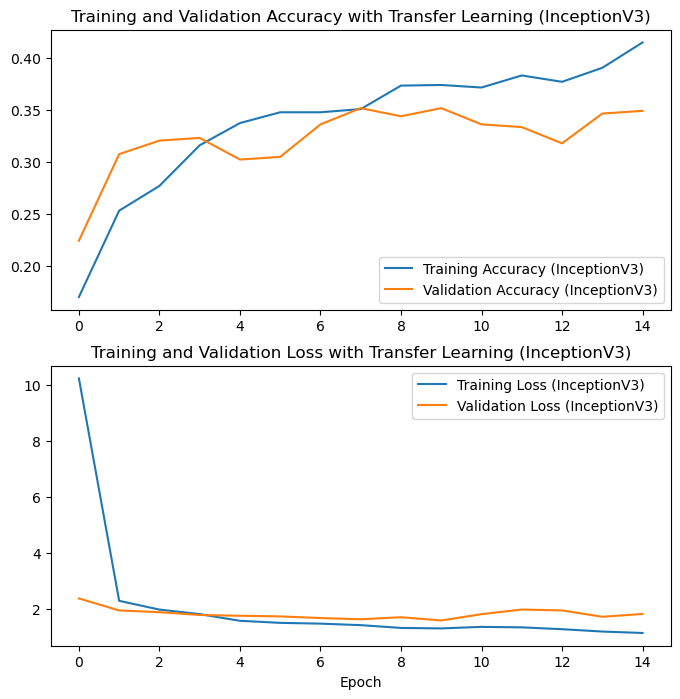

In [16]:
# Evaluation of the InceptionV3 transferred model
val_loss_transfer_inception, val_acc_transfer_inception = model_inception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)
print(f'Validation loss (InceptionV3): {val_loss_transfer_inception}, Validation accuracy (InceptionV3): {val_acc_transfer_inception}')

# Visualization of the training results with InceptionV3 transfer learning
acc_transfer_inception = history_inception.history['accuracy']
val_acc_transfer_inception = history_inception.history['val_accuracy']
loss_transfer_inception = history_inception.history['loss']
val_loss_transfer_inception = history_inception.history['val_loss']

epochs_transfer_inception = range(len(acc_transfer_inception))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_inception, acc_transfer_inception, label='Training Accuracy (InceptionV3)')
plt.plot(epochs_transfer_inception, val_acc_transfer_inception, label='Validation Accuracy (InceptionV3)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (InceptionV3)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_inception, loss_transfer_inception, label='Training Loss (InceptionV3)')
plt.plot(epochs_transfer_inception, val_loss_transfer_inception, label='Validation Loss (InceptionV3)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (InceptionV3)')
plt.xlabel('Epoch')
plt.show()


### Comparaison

12/12 [==============================] - 5s 430ms/step - loss: 1.6095 - accuracy: 0.3516


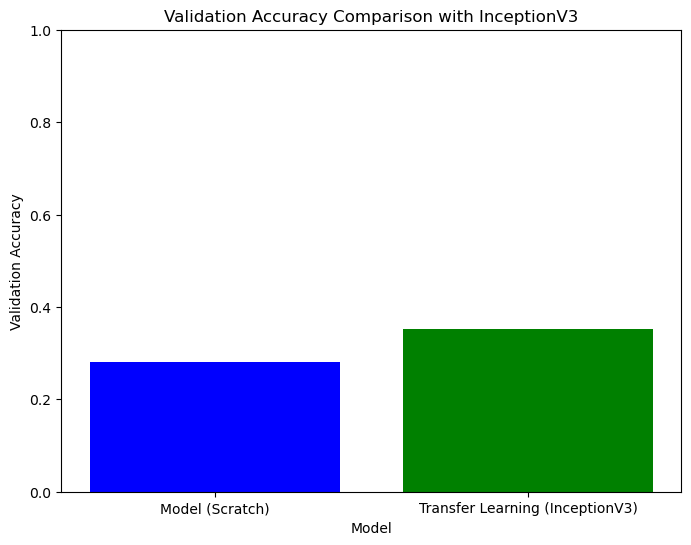

In [17]:
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator,
                                                    steps=validation_generator.samples // validation_generator.batch_size)
val_loss_transfer_inception, val_acc_transfer_inception = model_inception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)

#Visualization of comparison results for InceptionV3
plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning (InceptionV3)'], [val_acc_scratch, val_acc_transfer_inception], color=['blue', 'green'])
plt.title('Validation Accuracy Comparison with InceptionV3')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)  
plt.show()

#### Xception model

In [18]:
# Load the Xception pre-trained model with ImageNet weights
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the Xception model
for layer in base_model_xception.layers:
    layer.trainable = False

# Add custom layers to the Xception base model
x_xception = Flatten()(base_model_xception.output)
x_xception = Dense(512, activation='relu')(x_xception)
x_xception = Dropout(0.5)(x_xception)
predictions_xception = Dense(len(train_generator.class_indices), activation='softmax')(x_xception)

# Create the full model
model_xception = Model(inputs=base_model_xception.input, outputs=predictions_xception)

# Compile the Xception model
model_xception.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the Xception model
history_xception = model_xception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 77s 1s/step - loss: 9.7533 - accuracy: 0.1827 - val_loss: 2.1989 - val_accuracy: 0.3021
Epoch 2/50
52/52 [==============================] - 70s 1s/step - loss: 2.1786 - accuracy: 0.2902 - val_loss: 1.8883 - val_accuracy: 0.3151
Epoch 3/50
52/52 [==============================] - 69s 1s/step - loss: 1.7698 - accuracy: 0.3470 - val_loss: 1.8104 - val_accuracy: 0.3307
Epoch 4/50
52/52 [==============================] - 70s 1s/step - loss: 1.5555 - accuracy: 0.3818 - val_loss: 1.7521 - val_accuracy: 0.3568
Epoch 5/50
52/52 [==============================] - 73s 1s/step - loss: 1.3962 - accuracy: 0.3916 - val_loss: 1.8301 - val_accuracy: 0.3385
Epoch 6/50
52/52 [==============================] - 72s 1s/step - loss: 1.3140 - accuracy: 0.3903 - val_loss: 1.7755 - val_accuracy: 0.3333
Epoch 7/50
52/52 [==============================] - 72s 1s/step - loss: 1.2500 - accuracy: 0.3824 - val_loss: 1.6598 - val_accuracy: 0.3411
Epoch 8/50
52/52 [==

12/12 [==============================] - 12s 987ms/step - loss: 1.7078 - accuracy: 0.3516
Validation loss (Xception): 1.707770824432373, Validation accuracy (Xception): 0.3515625


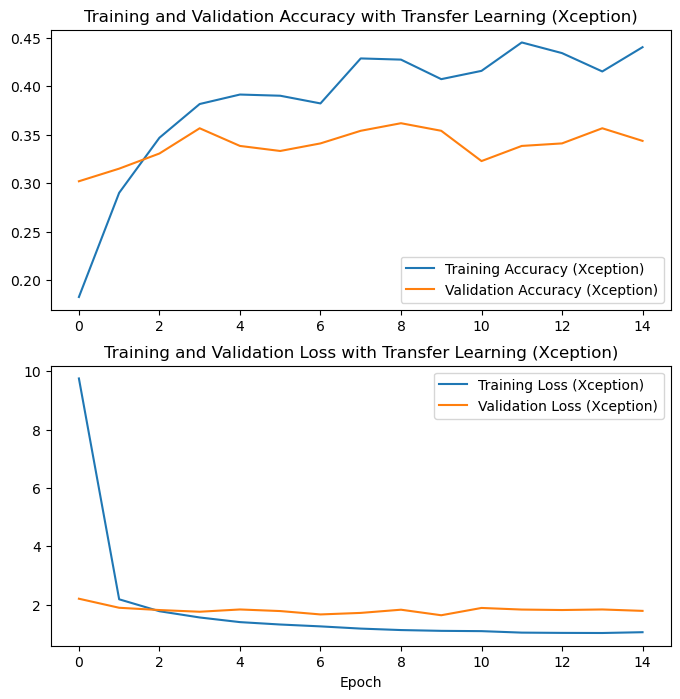

In [19]:
# Evaluation of the Xception transferred model
val_loss_transfer_xception, val_acc_transfer_xception = model_xception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)
print(f'Validation loss (Xception): {val_loss_transfer_xception}, Validation accuracy (Xception): {val_acc_transfer_xception}')

# Visualization of the training results with Xception transfer learning
acc_transfer_xception = history_xception.history['accuracy']
val_acc_transfer_xception = history_xception.history['val_accuracy']
loss_transfer_xception = history_xception.history['loss']
val_loss_transfer_xception = history_xception.history['val_loss']

epochs_transfer_xception = range(len(acc_transfer_xception))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_xception, acc_transfer_xception, label='Training Accuracy (Xception)')
plt.plot(epochs_transfer_xception, val_acc_transfer_xception, label='Validation Accuracy (Xception)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (Xception)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_xception, loss_transfer_xception, label='Training Loss (Xception)')
plt.plot(epochs_transfer_xception, val_loss_transfer_xception, label='Validation Loss (Xception)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (Xception)')
plt.xlabel('Epoch')
plt.show()


### Comparaison

12/12 [==============================] - 12s 955ms/step - loss: 1.6987 - accuracy: 0.3646


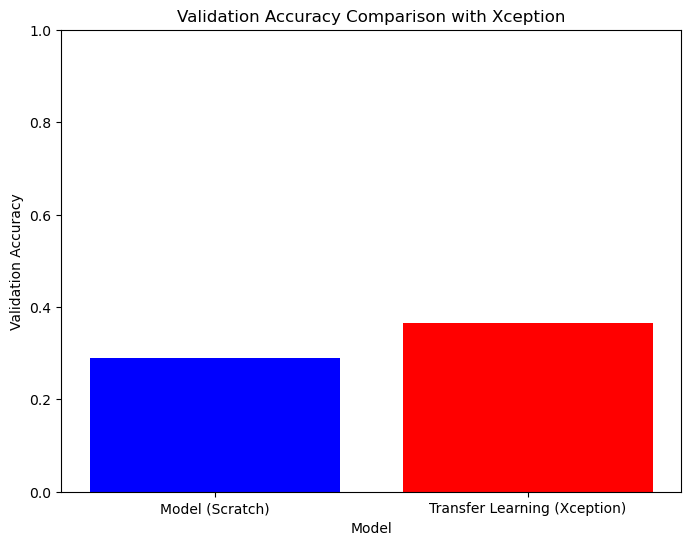

In [20]:
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator,
                                                   steps=validation_generator.samples // validation_generator.batch_size)



# Apr√®s avoir entra√Æn√© le mod√®le Xception avec transfert d'apprentissage
val_loss_transfer_xception, val_acc_transfer_xception = model_xception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)


# Visualization of comparison results for Xception
plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning (Xception)'], [val_acc_scratch, val_acc_transfer_xception], color=['blue', 'red'])
plt.title('Validation Accuracy Comparison with Xception')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)  # Make sure the y-axis starts at 0 and ends at 1 for consistency
plt.show()


## 3. Data Augmentation

In [21]:
#  Pr√©paration des donn√©es pour l'entra√Ænement

# Chemin vers le dossier contenant les images cropp√©es
base_dir = 'cropped_train_images'

# Cr√©ation des g√©n√©rateurs d'images avec augmentation de donn√©es pour l'entra√Ænement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Utilisation de 20% des donn√©es pour la validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images apr√®s redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='training')  # D√©fini pour l'entra√Ænement

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images apr√®s redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # D√©fini pour la validation

Found 1669 images belonging to 26 classes.
Found 406 images belonging to 26 classes.


Que l'on effectue une rotation, un changement de longueur ou de hauteur, un zoom ou un *flip* horizontal, on ne change pas la classe des images. C'est pour cette raison que l'on peut effectuer ces op√©rations dans le cadre de la *data augmentation*.

In [22]:
# Recompiler le mod√®le model1
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Entra√Ænement du mod√®le
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du mod√®le

val_loss, val_acc = model1.evaluate(validation_generator,
                                   steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_acc}')

Epoch 1/50
52/52 [==============================] - 43s 782ms/step - loss: 2.1639 - accuracy: 0.2315 - val_loss: 2.1675 - val_accuracy: 0.2578
Epoch 2/50
52/52 [==============================] - 40s 774ms/step - loss: 2.0476 - accuracy: 0.2572 - val_loss: 2.1155 - val_accuracy: 0.2708
Epoch 3/50
52/52 [==============================] - 40s 771ms/step - loss: 1.9875 - accuracy: 0.2749 - val_loss: 2.0913 - val_accuracy: 0.2682
Epoch 4/50
52/52 [==============================] - 40s 764ms/step - loss: 1.9425 - accuracy: 0.2724 - val_loss: 2.1171 - val_accuracy: 0.2552
Epoch 5/50
52/52 [==============================] - 40s 766ms/step - loss: 1.8978 - accuracy: 0.2749 - val_loss: 2.0702 - val_accuracy: 0.2344
Epoch 6/50
52/52 [==============================] - 40s 761ms/step - loss: 1.8788 - accuracy: 0.2914 - val_loss: 2.1369 - val_accuracy: 0.2422
Epoch 7/50
52/52 [==============================] - 40s 764ms/step - loss: 1.8421 - accuracy: 0.2951 - val_loss: 2.0577 - val_accuracy: 0.2839

üí¨ Remarque et conclusion

**√Ä partir de z√©ro :**

Avantages :
- Contr√¥le complet sur l'architecture.
- Aucune d√©pendance vis-√†-vis des mod√®les pr√©existants, ce qui peut √™tre b√©n√©fique si les donn√©es sont tr√®s diff√©rentes d'ImageNet.

Inconv√©nients :
- N√©cessite plus de donn√©es pour bien g√©n√©raliser.
- Temps d'entra√Ænement plus longs.
- Souvent, cela aboutit √† une pr√©cision inf√©rieure par rapport √† l'apprentissage par transfert, en particulier avec de petits ensembles de donn√©es.

**Apprentissage par transfert avec VGG16 :**

Avantages :
- B√©n√©ficie des poids pr√©-entra√Æn√©s sur ImageNet, ce qui aide √† la convergence.
- Bon pour apprendre des caract√©ristiques √† partir d'images qui sont quelque peu similaires √† ImageNet.
    
Inconv√©nients :
- R√©seau tr√®s profond avec de nombreux param√®tres, ce qui le rend gourmand en calcul.
- Tend √† √™tre plus lent que d'autres mod√®les comme ResNet ou Inception en raison de sa profondeur.

**Apprentissage par transfert avec ResNet50 :**

Avantages :

- Utilise des connexions r√©siduelles pour permettre l'entra√Ænement de r√©seaux tr√®s profonds sans d√©gradation.
- Convergence g√©n√©ralement plus rapide par rapport √† VGG16 gr√¢ce aux connexions de saut.

Inconv√©nients :
- Peut √™tre excessif pour des t√¢ches simples ou des ensembles de donn√©es tr√®s petits.

**Apprentissage par transfert avec InceptionV3 :**

Avantages :
- Utilise un m√©lange de tailles de filtres pour capturer des informations √† diverses √©chelles.
- Plus efficace en termes de param√®tres que VGG16.
    
Inconv√©nients :
- Une architecture plus complexe peut √™tre plus difficile √† adapter √† de nouvelles t√¢ches.
- Parfois plus lent √† entra√Æner en raison de la complexit√© des modules d'inception.

**Apprentissage par transfert avec Xception :**

Avantages :
- Utilise des convolutions s√©parables en profondeur, qui peuvent √™tre plus efficaces que les convolutions traditionnelles.
- Atteint souvent une pr√©cision plus √©lev√©e sur les ensembles de donn√©es de r√©f√©rence.

Inconv√©nients :
- Peut n√©cessiter plus de r√©glages fins pour adapter les poids pr√©-entra√Æn√©s √† une nouvelle t√¢che.
- Peut toujours √™tre gourmand en calcul malgr√© l'efficacit√© de ses convolutions.
